# 🌍 World CO₂ Emissions — EDA (Country–Year Format)

This notebook performs a complete exploratory data analysis (EDA) on a **country–year emissions dataset**.

The dataset includes:
- Country identifiers (`Country Name`, `Country Code`)
- A `YEAR` column
- Multiple emissions-related indicators (CO₂, methane, nitrous oxide, total GHG, etc.)

We will explore:
- Data quality (missing values, duplicates, types)
- Univariate distributions (per year & per metric)
- Bivariate relationships (between indicators and across time)
- Multivariate patterns (correlation and joint behaviour)


In [ ]:

# === 1. Setup & Load Data ===

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

plt.style.use("default")

# Load the attached dataset
df = pd.read_csv(r"C:\Users\brien\OneDrive\Documents\2nd Sem\CAPSTONE\dataset 1 worked on\Cleaned CO2 Dataset 1.csv")

print("Loaded shape:", df.shape)
df.head()


Loaded shape: (16678, 34)


,Country Name,Country Code,YEAR,Adjusted savings: carbon dioxide damage (% of GNI),Adjusted savings: carbon dioxide damage (current US$),Agricultural methane emissions (thousand metric tons of CO2 equivalent),Agricultural nitrous oxide emissions (thousand metric tons of CO2 equivalent),CO2 emissions (kg per 2015 US$ of GDP),CO2 emissions (kg per 2017 PPP $ of GDP),CO2 emissions (kg per PPP $ of GDP),...,GHG net emissions/removals by LUCF (Mt of CO2 equivalent),HFC gas emissions (thousand metric tons of CO2 equivalent),Methane emissions (kt of CO2 equivalent),Methane emissions in energy sector (thousand metric tons of CO2 equivalent),Nitrous oxide emissions (thousand metric tons of CO2 equivalent),Nitrous oxide emissions in energy sector (thousand metric tons of CO2 equivalent),"Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent)",PFC gas emissions (thousand metric tons of CO2 equivalent),SF6 gas emissions (thousand metric tons of CO2 equivalent),Total greenhouse gas emissions (kt of CO2 equivalent)
0,Afghanistan,ABW,1960,20.345601,4.881986e+06,22.556391,22.556391,19.826444,19.877825,19.826444,...,22.005843,25.669,28.254785,22.002,23.745049,21.672662,22.005843,23.745049,23.745049,29.753068
1,Afghanistan,ABW,1961,20.227645,4.881986e+06,22.556391,22.556391,19.826444,19.877825,19.826444,...,22.005843,25.669,28.254785,22.002,23.745049,21.672662,22.005843,23.745049,23.745049,29.753068
2,Afghanistan,ABW,1962,21.640583,4.881986e+06,22.556391,22.556391,19.826444,19.877825,19.826444,...,22.005843,25.669,28.254785,22.002,23.745049,21.672662,22.005843,23.745049,23.745049,29.753068
3,Afghanistan,ABW,1963,20.675552,4.881986e+06,22.556391,22.556391,19.826444,19.877825,19.826444,...,22.005843,25.669,28.254785,22.002,23.745049,21.672662,22.005843,23.745049,23.745049,29.753068
4,Afghanistan,ABW,1964,21.672662,4.881986e+06,22.556391,22.556391,19.826444,19.877825,19.826444,...,22.005843,25.669,28.254785,22.002,23.745049,21.672662,22.005843,23.745049,23.745049,29.753068


## 2) Data Cleaning & Structure

Here we:
- Inspect shape, column names, and dtypes  
- Check missing values and duplicates  
- Separate **numeric vs categorical** columns  
- Impute missing values (median for numeric, mode for categorical)  
- Fix the `YEAR` datatype  


In [ ]:

# === 2.1 Basic inspection ===

print("Initial shape:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())

print("\nData types (first 20):")
print(df.dtypes.head(20))

print("\nMissing values per column (first 20):")
print(df.isna().sum().head(20))

print("\nDuplicate rows:", df.duplicated().sum())

# Drop duplicates if any
df = df.drop_duplicates()
print("Shape after dropping duplicates:", df.shape)

# Identify numeric & categorical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

print("\nNumeric columns (first 10):", numeric_cols[:10])
print("Categorical columns:", categorical_cols)

# Impute numerical with median
for col in numeric_cols:
    if df[col].isna().sum() > 0:
        df[col] = df[col].fillna(df[col].median())

# Impute categorical with mode
for col in categorical_cols:
    if df[col].isna().sum() > 0:
        mode_vals = df[col].mode()
        if len(mode_vals) > 0:
            df[col] = df[col].fillna(mode_vals[0])

# Fix YEAR
if "YEAR" in df.columns:
    df["YEAR"] = pd.to_numeric(df["YEAR"], errors="coerce").astype("Int64")

print("\nMissing values after imputation (first 20):")
print(df.isna().sum().head(20))


Initial shape: (16678, 34)

Column names:
['Country Name', 'Country Code', 'YEAR', 'Adjusted savings: carbon dioxide damage (% of GNI)', 'Adjusted savings: carbon dioxide damage (current US$)', 'Agricultural methane emissions (thousand metric tons of CO2 equivalent)', 'Agricultural nitrous oxide emissions (thousand metric tons of CO2 equivalent)', 'CO2 emissions (kg per 2015 US$ of GDP)', 'CO2 emissions (kg per 2017 PPP $ of GDP)', 'CO2 emissions (kg per PPP $ of GDP)', 'CO2 emissions (kt)', 'CO2 emissions (metric tons per capita)', 'CO2 emissions from electricity and heat production, total (% of total fuel combustion)', 'CO2 emissions from gaseous fuel consumption (% of total)', 'CO2 emissions from gaseous fuel consumption (kt)', 'CO2 emissions from liquid fuel consumption (% of total)', 'CO2 emissions from liquid fuel consumption (kt)', 'CO2 emissions from manufacturing industries and construction (% of total fuel combustion)', 'CO2 emissions from other sectors, excluding residential

## 3) Summary Statistics

We now look at:

- Descriptive statistics for numeric indicators  
- Top categories for key categorical fields  


In [ ]:

# Numerical summary
print("Numerical summary (first 15 numeric columns):")
display(df[numeric_cols].describe().T.head(15))

# Categorical summary
for col in categorical_cols:
    print(f"\nTop categories for: {col}")
    display(df[col].value_counts().head(10))


Numerical summary (first 15 numeric columns):


,count,mean,std,min,25%,50%,75%,max
YEAR,16678.0,1990.5,17.896067,1960.0,1975.0,1990.5,2006.0,2021.0
Adjusted savings: carbon dioxide damage (% of GNI),16678.0,1300841.713367,10160083.96566,0.003235,0.87062,2.166412,20.645257,80651255.21
Adjusted savings: carbon dioxide damage (current US$),16678.0,1450731942.473531,11953244465.30212,19.417939,22.14348,4881986.1505,169110292.95,429190000000.0
Agricultural methane emissions (thousand metric tons of CO2 equivalent),16678.0,1351347.775018,10100077.025966,0.0,20.391778,22.556391,4996.529375,80651255.21
Agricultural nitrous oxide emissions (thousand metric tons of CO2 equivalent),16678.0,1325812.793752,10100641.029692,0.0,20.391778,22.556391,3726.5794,80651255.21
CO2 emissions (kg per 2015 US$ of GDP),16678.0,1286337.684437,10104193.482731,0.0,0.476221,19.826444,21.092993,80651255.21
CO2 emissions (kg per 2017 PPP $ of GDP),16678.0,1286338.565254,10104193.370615,0.0,0.251019,19.877825,21.265255,80651255.21
CO2 emissions (kg per PPP $ of GDP),16678.0,1286338.50841,10104193.377854,0.0,0.30108,19.826444,21.265255,80651255.21
CO2 emissions (kt),16678.0,1741167.972336,10302875.107367,0.0,20.625,29.685132,17902.475,80651255.21
CO2 emissions (metric tons per capita),16678.0,1286337.779045,10104193.470654,0.0,3.127741,19.770408,20.812263,80651255.21



Top categories for: Country Name


Country Name
Afghanistan                   124
Africa Western and Central     62
Albania                        62
Algeria                        62
American Samoa                 62
Andorra                        62
Angola                         62
Antigua and Barbuda            62
Arab World                     62
Argentina                      62
Name: count, dtype: int64


Top categories for: Country Code


Country Code
ABW    248
AFG     62
AFE     62
AFW     62
ALB     62
DZA     62
ASM     62
AND     62
AGO     62
ATG     62
Name: count, dtype: int64

## 4) Univariate Analysis

We explore:

- **Numerical:** CO₂ and GHG metrics across selected years  
- **Categorical:** Distribution of countries in the dataset  


Univariate analysis examines each variable individually to understand its distribution, central tendency, and spread of data. For numerical variables (like CO₂ emission values by year), it helps identify how the data is distributed across different ranges and whether there are outliers or skewness in the values.

Two common visualization techniques are used:

Histogram: Displays the frequency distribution of numerical data. It helps to see whether data is normally distributed, left/right-skewed, or has multiple peaks.

Boxplot: Summarizes data using the five-number summary (minimum, first quartile, median, third quartile, and maximum). It clearly highlights outliers and shows the spread and symmetry of the dataset.

💡 In this project, histograms and boxplots are used to analyze year-wise CO₂ emissions for different countries and series. This helps to understand which years or categories have the highest or lowest emission values and how evenly or unevenly they are distributed.

We explore each variable by itself to understand distributions and common categories.

Main emissions column used for univariate analysis: CO2 emissions (kt)


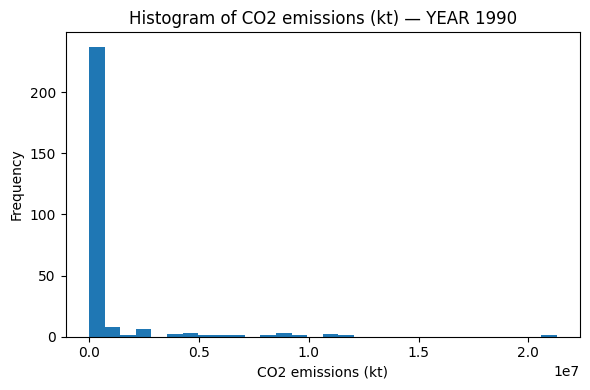

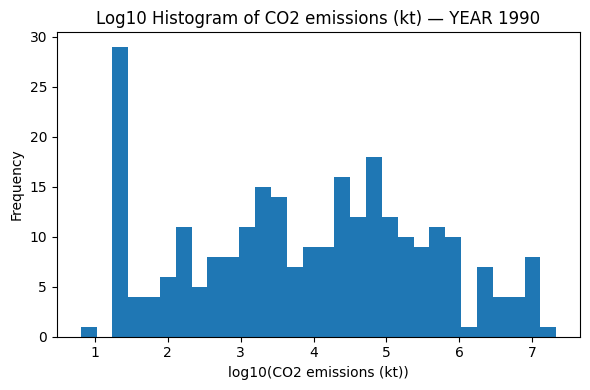

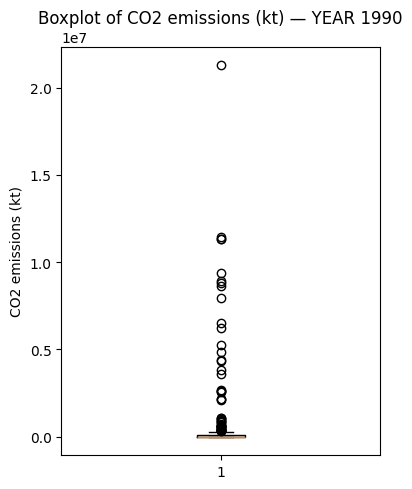

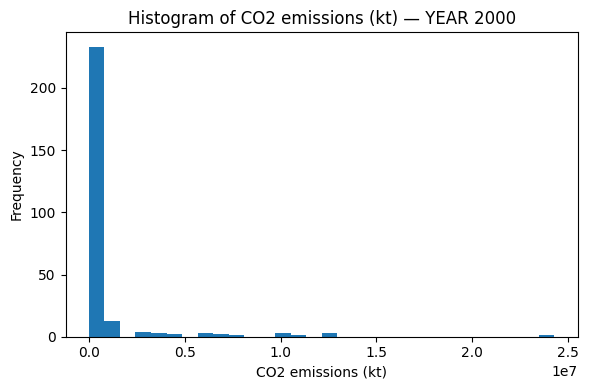

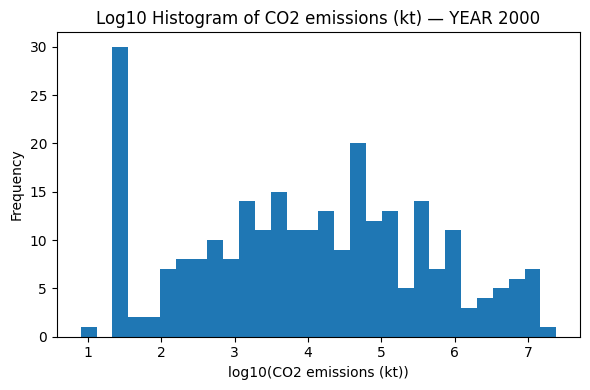

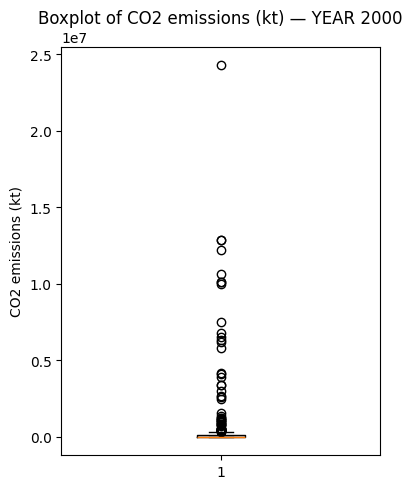

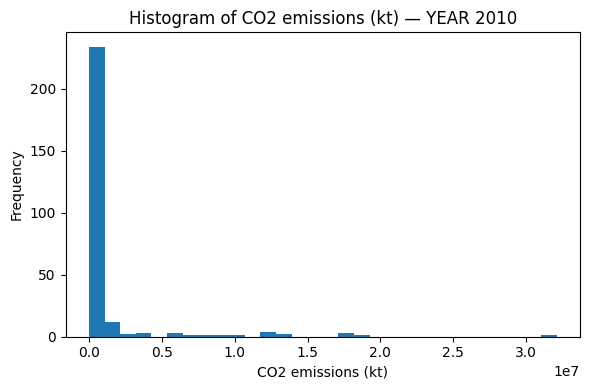

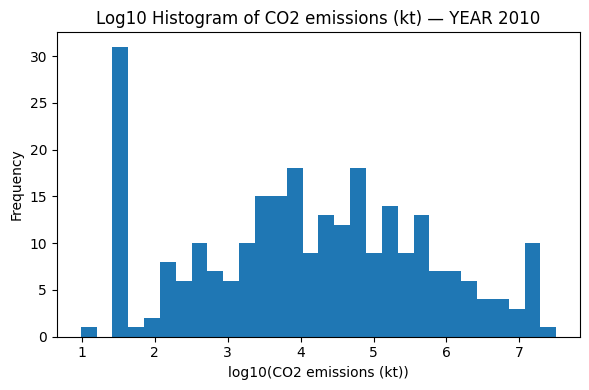

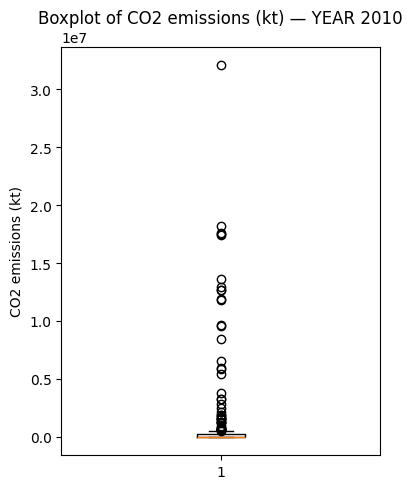

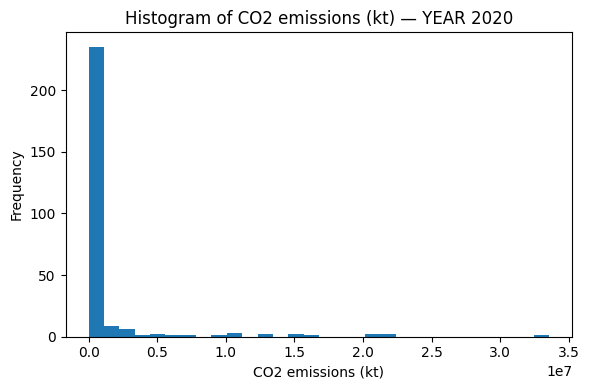

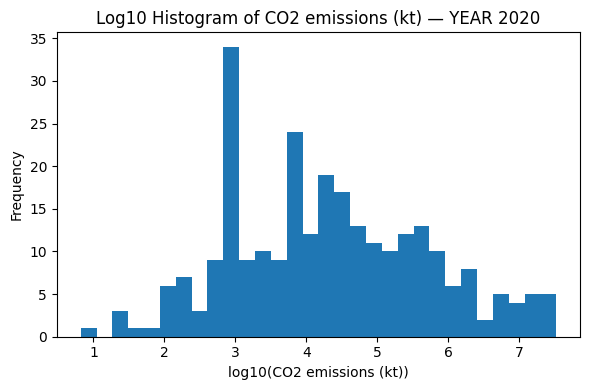

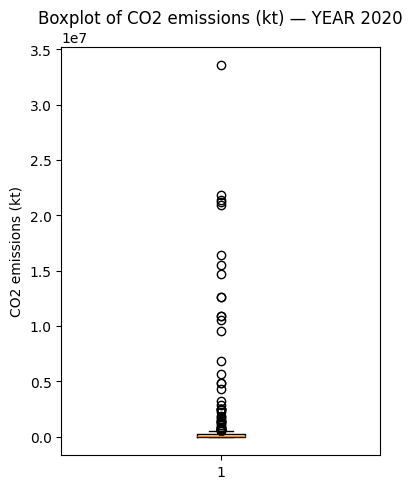

Top 15 Country Name:


Country Name
Afghanistan                   124
Africa Western and Central     62
Albania                        62
Algeria                        62
American Samoa                 62
Andorra                        62
Angola                         62
Antigua and Barbuda            62
Arab World                     62
Argentina                      62
Armenia                        62
Serbia                         62
Chad                           62
Russian Federation             62
Rwanda                         62
Name: count, dtype: int64

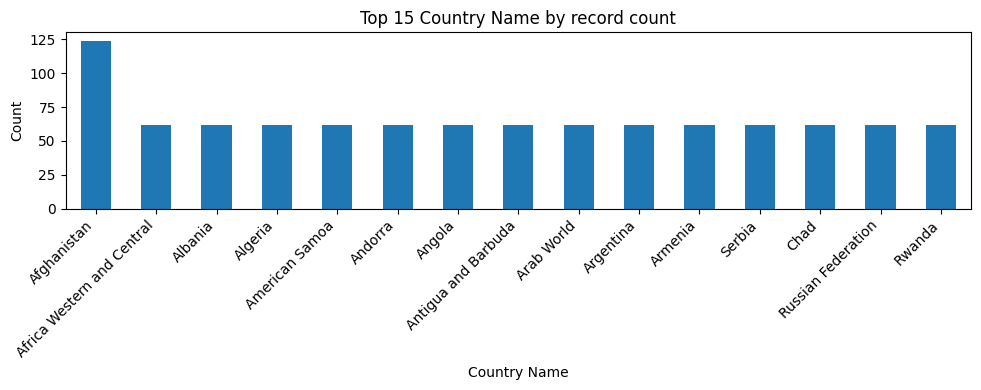

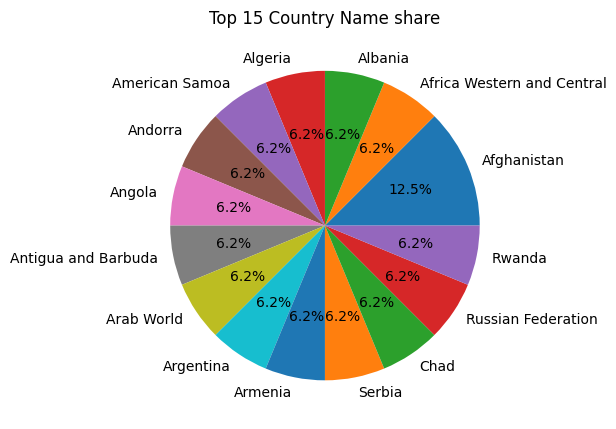

In [ ]:

# Pick a main emissions metric for analysis
main_emission_col = None
for cand in [
    "CO2 emissions (kt)",
    "Total greenhouse gas emissions (kt of CO2 equivalent)",
    "CO2 emissions (metric tons per capita)"
]:
    if cand in df.columns:
        main_emission_col = cand
        break

if main_emission_col is None:
    # fallback: first numeric column that is not YEAR
    numeric_no_year = [c for c in numeric_cols if c != "YEAR"]
    main_emission_col = numeric_no_year[0] if numeric_no_year else None

print("Main emissions column used for univariate analysis:", main_emission_col)

# === 4.1 Histograms & Boxplots for Selected Years ===

years_to_analyze = [1990, 2000, 2010, 2020]
for year in years_to_analyze:
    if "YEAR" in df.columns and main_emission_col is not None:
        subset = df[df["YEAR"] == year][main_emission_col].dropna()
        if subset.empty:
            print(f"⚠️ No data for YEAR = {year} in column '{main_emission_col}'.")
            continue

        # Histogram (original scale)
        plt.figure(figsize=(6,4))
        plt.hist(subset, bins=30)
        plt.title(f"Histogram of {main_emission_col} — YEAR {year}")
        plt.xlabel(main_emission_col)
        plt.ylabel("Frequency")
        plt.tight_layout()
        plt.show()

        # Histogram (log scale, only positive values)
        positive = subset[subset > 0]
        if not positive.empty:
            plt.figure(figsize=(6,4))
            plt.hist(np.log10(positive), bins=30)
            plt.title(f"Log10 Histogram of {main_emission_col} — YEAR {year}")
            plt.xlabel(f"log10({main_emission_col})")
            plt.ylabel("Frequency")
            plt.tight_layout()
            plt.show()

        # Boxplot
        plt.figure(figsize=(4,5))
        plt.boxplot(subset, vert=True)
        plt.title(f"Boxplot of {main_emission_col} — YEAR {year}")
        plt.ylabel(main_emission_col)
        plt.tight_layout()
        plt.show()

# === 4.2 Categorical: Country distribution ===

country_col = None
for cand in ["Country Name", "COUNTRY", "country"]:
    if cand in df.columns:
        country_col = cand
        break

if country_col is not None:
    top_countries = df[country_col].value_counts().head(15)
    print(f"Top 15 {country_col}:")
    display(top_countries)

    plt.figure(figsize=(10,4))
    top_countries.plot(kind="bar")
    plt.title(f"Top 15 {country_col} by record count")
    plt.xlabel(country_col)
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(6,6))
    top_countries.plot(kind="pie", autopct="%1.1f%%")
    plt.title(f"Top 15 {country_col} share")
    plt.ylabel("")
    plt.tight_layout()
    plt.show()
else:
    print("No country-like column found for categorical univariate analysis.")


Interpretation of Year-wise Univariate Analysis without log transfomations

The histograms for years 1990, 2000, 2010, and 2020 show a right-skewed distribution, meaning most countries produce relatively low CO₂ emissions, while a few countries have extremely high emission values.

Although each year’s chart looks similar in shape, the overall scale of values increases over time, indicating that global CO₂ emissions have risen.

The similarity in the histogram patterns occurs because emission levels across countries follow the same global trend — a few highly industrialized nations contribute a major portion of emissions, while many developing countries have much lower values.

Boxplots also confirm this trend, showing several outliers (countries with unusually high emissions) beyond the upper whisker each year

Interpretation of Boxplots for 1990, 2000, 2010, and 2020

The boxplots for each selected year (1990, 2000, 2010, and 2020) reveal a similar pattern in the global distribution of CO₂ emissions. Each boxplot shows a low median value and** several outliers** far above the upper whisker, indicating that while most countries produce comparatively low CO₂ emissions, a few countries contribute exceptionally** high levels.**

This consistent presence of extreme outliers highlights the inequality in global emissions — where industrialized nations dominate the higher end of the scale, and the majority of countries remain clustered near the lower emission range. The flat, compressed box near the bottom suggests that the majority of countries are clustered at very low emission values, showing strong inequality in global emissions during that period

Over time, although the overall shape of the boxplots remains similar, the upper range (outlier values) tends to increase, suggesting that total emissions have grown, and the gap between high- and low-emission countries has widened.

## 5) Bivariate Analysis

We now look at **relationships between two variables**:

- Numerical vs numerical (e.g., CO₂ vs GHG, or emissions at different years)  
- Categorical vs numerical (e.g., emissions distribution for top countries)  


Bivariate analysis studies the relationship between two variables— either both numerical or categorical, or one numerical and one categorical.

We analyze relationships between two variables at a time.

Numerical vs Numerical: Scatter plots & correlation coefficients
Categorical vs Numerical: Boxplots (distribution of numeric by category)
Categorical vs Categorical: Crosstab heatmap (counts)

Secondary emissions column for bivariate analysis: Total greenhouse gas emissions (kt of CO2 equivalent)


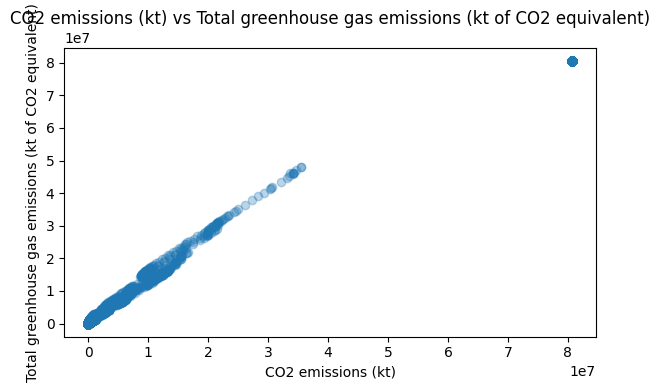

Correlation between 'CO2 emissions (kt)' and 'Total greenhouse gas emissions (kt of CO2 equivalent)': 0.996


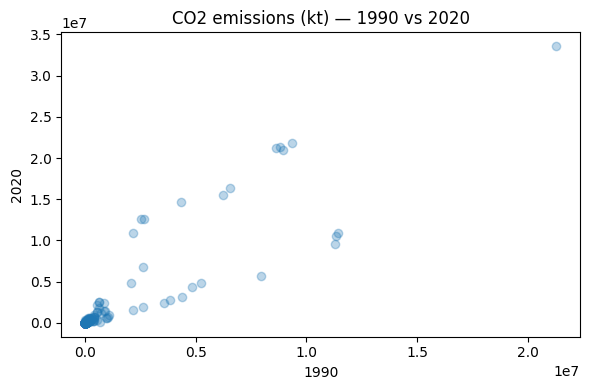

Correlation of CO2 emissions (kt) between 1990 and 2020: 0.895


C:\Users\brien\AppData\Local\Temp\ipykernel_17500\2524206260.py:65: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=top5_countries)


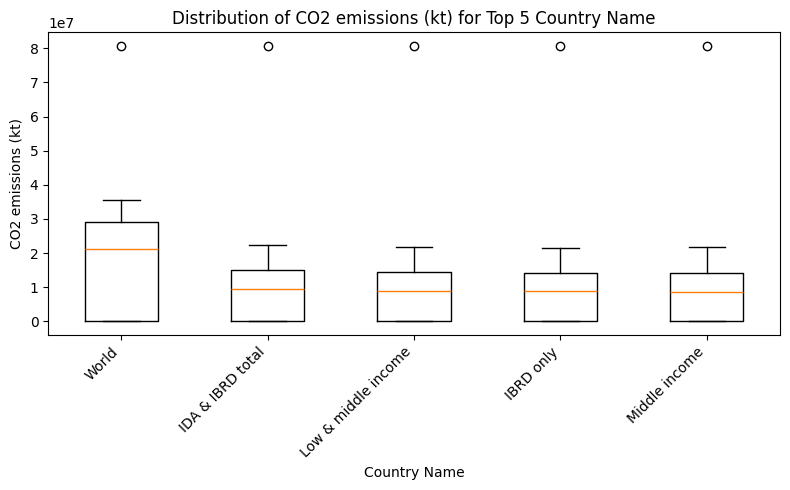

In [ ]:

# === 5.1 Numeric vs Numeric: main emission vs another metric ===

# Choose a secondary emissions metric
secondary_col = None
candidates = [
    "Total greenhouse gas emissions (kt of CO2 equivalent)",
    "Methane emissions (kt of CO2 equivalent)",
    "Nitrous oxide emissions (thousand metric tons of CO2 equivalent)"
]
for cand in candidates:
    if cand in df.columns and cand != main_emission_col:
        secondary_col = cand
        break

print("Secondary emissions column for bivariate analysis:", secondary_col)

if main_emission_col is not None and secondary_col is not None:
    plt.figure(figsize=(6,4))
    plt.scatter(df[main_emission_col], df[secondary_col], alpha=0.3)
    plt.title(f"{main_emission_col} vs {secondary_col}")
    plt.xlabel(main_emission_col)
    plt.ylabel(secondary_col)
    plt.tight_layout()
    plt.show()

    corr_val = df[[main_emission_col, secondary_col]].corr().iloc[0,1]
    print(f"Correlation between '{main_emission_col}' and '{secondary_col}': {corr_val:.3f}")

# === 5.2 Numeric vs Numeric: same metric, different years ===

if "YEAR" in df.columns and main_emission_col is not None:
    # Pivot to have YEAR as columns for main_emission_col
    pivot = df.pivot_table(index=country_col, columns="YEAR", values=main_emission_col)

    year_x, year_y = 1990, 2020
    if year_x in pivot.columns and year_y in pivot.columns:
        x_vals = pivot[year_x]
        y_vals = pivot[year_y]

        plt.figure(figsize=(6,4))
        plt.scatter(x_vals, y_vals, alpha=0.3)
        plt.title(f"{main_emission_col} — {year_x} vs {year_y}")
        plt.xlabel(f"{year_x}")
        plt.ylabel(f"{year_y}")
        plt.tight_layout()
        plt.show()

        corr_xy = x_vals.corr(y_vals)
        print(f"Correlation of {main_emission_col} between {year_x} and {year_y}: {corr_xy:.3f}")
    else:
        print("Not enough YEAR coverage for 1990 and 2020 in the pivoted data.")

# === 5.3 Categorical vs Numeric: boxplot of top 5 countries ===

if country_col is not None and main_emission_col is not None:
    # Compute mean emission per country
    mean_by_country = df.groupby(country_col)[main_emission_col].mean().sort_values(ascending=False)
    top5_countries = mean_by_country.head(5).index

    subset = df[df[country_col].isin(top5_countries)]

    data_to_plot = [subset[subset[country_col] == c][main_emission_col] for c in top5_countries]

    plt.figure(figsize=(8,5))
    plt.boxplot(data_to_plot, labels=top5_countries)
    plt.title(f"Distribution of {main_emission_col} for Top 5 {country_col}")
    plt.xlabel(country_col)
    plt.ylabel(main_emission_col)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


Insight: Scatter Plot (CO₂ Emissions 1990 vs 2020)

The scatter plot shows a strong positive relationship between CO₂ emissions in 1990 and 2020. Countries that had high emissions in 1990 continue to have high emissions in 2020, which indicates that global emission patterns remain largely consistent over time. Most points are concentrated near the lower left, representing countries with low emissions in both years, while a few points extend toward the upper right corner — these correspond to major industrialized nations (such as the U.S., China, and India) with very high emission levels. bold text The correlation suggests that historically high-emission countries have maintained their dominant contribution to global CO₂ output over the decades.

## 6) Multivariate Analysis (Correlation & Scatter Matrix)

To understand how multiple indicators move together, we will:

- Compute a **correlation matrix** for a subset of key emissions variables  
- Visualize it using a **heatmap-style image**  
- Use a **scatter matrix** to inspect pairwise relationships  


In [ ]:
import seaborn as sns

Key emissions used for multivariate analysis:
['CO2 emissions (kt)', 'CO2 emissions (metric tons per capita)', 'Methane emissions (kt of CO2 equivalent)', 'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)', 'Total greenhouse gas emissions (kt of CO2 equivalent)']


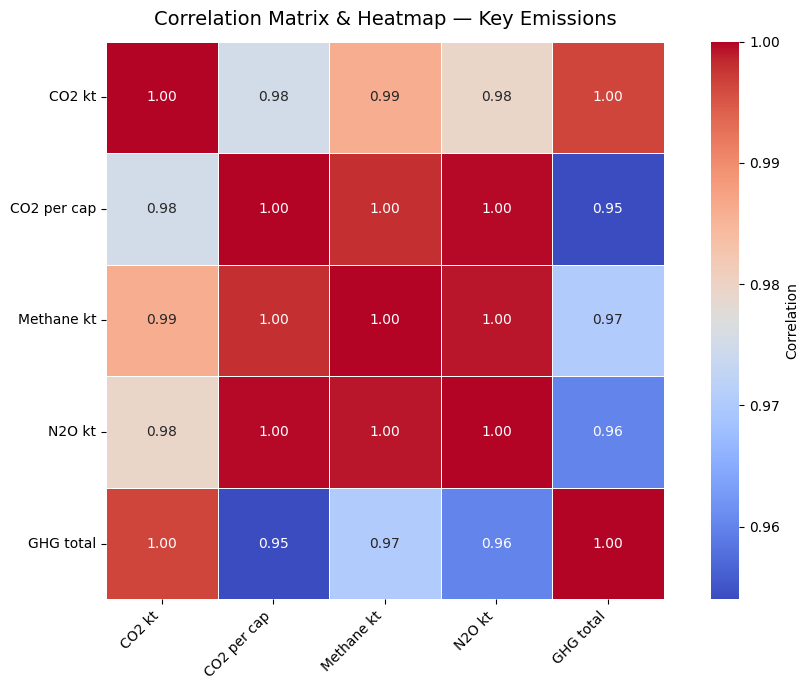

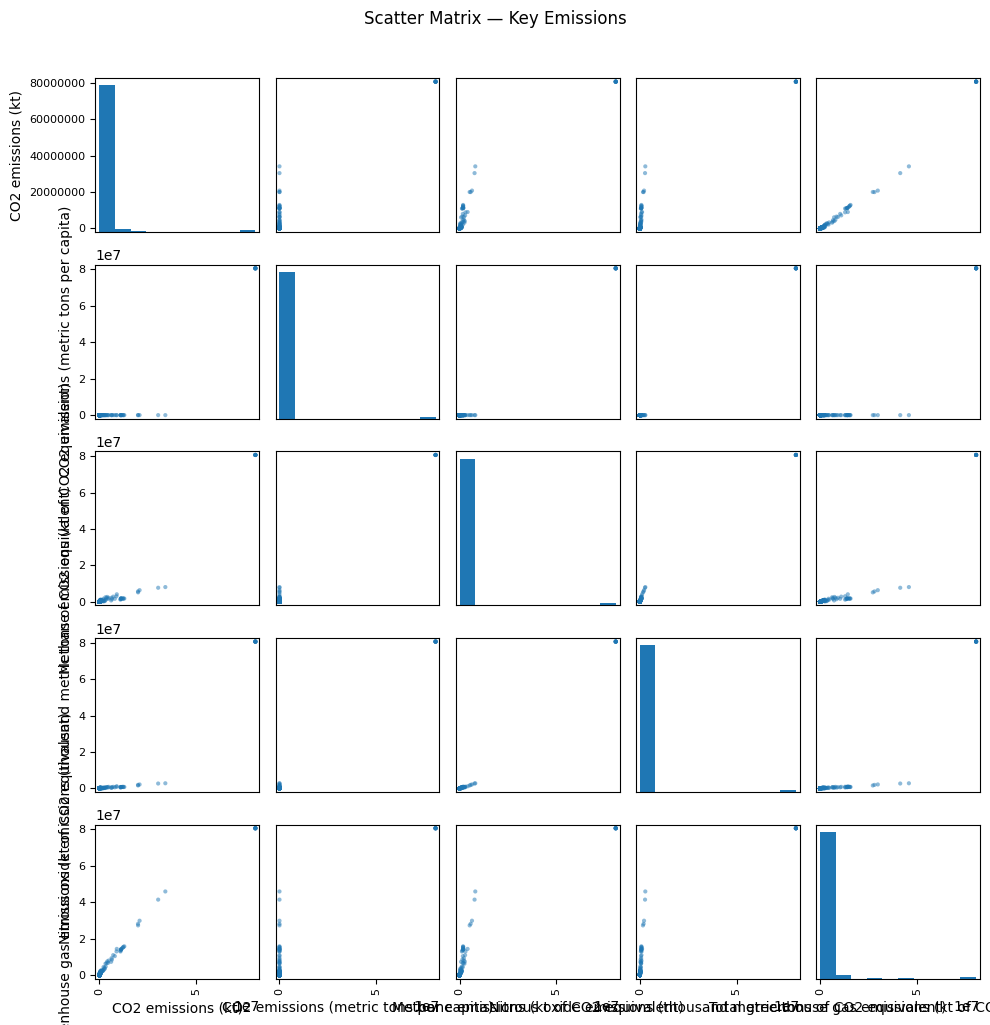

In [ ]:
# === 6) Multivariate Analysis — Correlation Heatmap & Scatter Matrix ===

import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

# 1. Choose a small set of key emission columns
key_emissions = []

for cand in [
    "CO2 emissions (kt)",
    "CO2 emissions (metric tons per capita)",
    "Methane emissions (kt of CO2 equivalent)",
    "Nitrous oxide emissions (thousand metric tons of CO2 equivalent)",
    "Total greenhouse gas emissions (kt of CO2 equivalent)"
]:
    if cand in df.columns:
        key_emissions.append(cand)

print("Key emissions used for multivariate analysis:")
print(key_emissions)

if len(key_emissions) >= 2:
    # 2. Compute correlation matrix
    corr_subset = df[key_emissions].corr()

    # 3. Shorten long feature names for a cleaner heatmap
    short_labels = {
        "CO2 emissions (kt)": "CO2 kt",
        "CO2 emissions (metric tons per capita)": "CO2 per cap",
        "Methane emissions (kt of CO2 equivalent)": "Methane kt",
        "Nitrous oxide emissions (thousand metric tons of CO2 equivalent)": "N2O kt",
        "Total greenhouse gas emissions (kt of CO2 equivalent)": "GHG total"
    }

    corr_subset_short = corr_subset.copy()
    corr_subset_short.columns = [short_labels.get(col, col) for col in corr_subset.columns]
    corr_subset_short.index = corr_subset_short.columns

    # 4. Clean Seaborn heatmap with short labels
    plt.figure(figsize=(10, 7))
    sns.heatmap(
        corr_subset_short,
        cmap="coolwarm",
        annot=True,
        fmt=".2f",
        linewidths=0.5,
        square=True,
        cbar_kws={"label": "Correlation"}
    )
    plt.title("Correlation Matrix & Heatmap — Key Emissions", fontsize=14, pad=12)
    plt.xticks(rotation=45, ha="right")
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    # 5. Scatter matrix (sample to keep it light)
    sample = df[key_emissions].sample(min(600, len(df)), random_state=42)
    scatter_matrix(sample, figsize=(10, 10))
    plt.suptitle("Scatter Matrix — Key Emissions", y=1.02)
    plt.tight_layout()
    plt.show()


This heatmap visualizes how strongly different greenhouse gas emission metrics are related (correlated) to each other.

A correlation value:

+1.00 = perfect positive relationship

0 = no relationship

–1.00 = perfect negative relationship

**Variables Compared**

The heatmap compares 5 emission-related variables:

CO₂ kt – Total CO₂ emissions in kilotonnes

CO₂ per capita – CO₂ emissions per person

Methane kt – Total methane emissions in kilotonnes

N₂O kt – Nitrous oxide emissions in kilotonnes

GHG total – Total greenhouse gas emissions

**Color Meaning**

Dark Red (near 1.00): Very strong positive correlation

Light Red/Orange: Strong positive correlation

Light Blue: Moderate positive correlation

Dark Blue: Lowest correlation (still positive)

Color Bar: Shows strength of correlation (0.95 → 1.00)

All correlations here are positive, meaning all emission variables increase together.

This means:

Countries that emit more CO₂ also tend to emit more methane and N₂O.

Total GHG emissions are strongly driven by CO₂, methane, and N₂O values.

Emission types move together — they rise and fall in a similar pattern globally.

1. Highest correlations (1.00)

These occur between:

CO₂ per capita ↔ Methane

CO₂ per capita ↔ N₂O

Methane ↔ N₂O

These gases behave almost identically across countries.

2. Slightly lower correlations (0.95–0.97)

These occur between GHG total and:

CO₂ per capita (0.95)

Methane (0.97)

N₂O (0.96)

Still very strong, but slightly weaker compared to other pairs.

3. Very strong correlation between CO₂ kt & other gases

CO₂ kt ↔ Methane = 0.99

CO₂ kt ↔ CO₂ per capita = 0.98

CO₂ kt ↔ N₂O = 0.98

CO₂ kt ↔ GHG total = 1.00

CO₂ emissions are a major driver of total greenhouse gases.

How to Interpret the Plot
Variables: The plot compares different measures of greenhouse gas emissions, likely for various countries or data points. The axes include:
CO₂ emissions (kt): Carbon dioxide emissions measured in kilotons.
CO₂ emissions (metric tons per capita): Carbon dioxide emissions per person.
Methane emissions (kt CO₂ equivalent): Methane emissions measured in kilotons of CO₂ equivalent.
Other unnamed emissions variables are also present along the remaining axes.

Scatter Plots (Off-Diagonal): Each small plot off the main diagonal shows the relationship between two different variables. By examining the pattern of points, one can determine if a positive correlation (points trend upward together), negative correlation (points trend downward), or no correlation exists. The dense concentration of points indicates significant positive correlations between many of the emissions types.
Histograms/Distribution (Diagonal): The plots along the main diagonal (where a variable would be plotted against itself) typically display histograms or density plots, showing the distribution of values for each individual variable. These help identify the spread of the data and potential outliers within a single variable.


## 7 Group Member Insights on the EDA Findings

Each group member reviewed the EDA results and contributed
brief insights:
### **1. Sohel noted a clear upward trend in major greenhouse gases over several decades,
### **2. Dinesh explained that the strong positive relationships among CO2, methane, nitrous oxide, and total GHG emissions
### **3. Brien noticed large country-level disparities, where a few nations account for most emissions and pointed out that this reflects differences in development and industrial activity which suggests a need for targeted reduction strategies.
### **4. Riya observed that emission variables are right-skewed, with a few extreme emitters. She also noticed that log transformations make patterns clearer and that outliers significantly influence global averages
### **5. Ravina focused on category-based comparisons and observed that developing countries generally have lower per-capita emissions but rising trends.

## Summary of Insights

- **Distribution shape:** CO₂ and GHG emissions are usually **right-skewed**, with a few very high-emitting countries and many low emitters.  
- **Temporal stability:** Countries with high emissions in earlier years (e.g., 1990) tend to remain high emitters in later years (e.g., 2020), as seen in cross-year scatterplots.  
- **Cross-indicator relationships:** Strong positive correlations often appear between CO₂, methane, nitrous oxide, and total GHG emissions, suggesting they move together and may be partially redundant as model features.  
- **Country differences:** Boxplots and group summaries highlight that a small set of countries contributes disproportionately to global emissions.  
- **Multivariate structure:** Correlation and scatter matrices reveal clusters of indicators that behave similarly, guiding feature selection for modeling or further analysis.  

## Next Steps for the Group Project (Next Semester)

- Model Development: Build predictive models (e.g., linear regression, random forest) to forecast future CO2 emissions using the cleaned datasets.
- Feature Engineering: Create new variables such as emission growth rate, region-based averages, and per-capita indicators to improve model performance.
- Time-Series Analysis: Perform deeper analysis on year-over-year emission trends and build forecasting models (ARIMA, Prophet, etc.).
- Machine Learning Evaluation: Compare multiple models and select the best predictive approach based on accuracy and interpretability.
- Policy Recommendation Draft: Start creating recommendations for emission reduction based on analytical results.
